In [1]:
import os
import warnings

import pandas

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-paper')

from soma.generators.normal import MultivariateNormalGenerator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors

In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
samples = np.array([100, 250, 500, 1000, 2500, 5000])
repeat = 200

# Normal (scale)

In [5]:
means = np.zeros(1000)

ns1 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means) + 1)

In [6]:
#ns_results = stat_errors_vs_sample_size(ns1, ns2, tests, samples, repeat=repeat)
#ns_results.to_csv(os.path.join(plot_dir, 'ns_results_samples.csv'))
ns_results = pandas.read_csv('../../results/sample_size/ns_results_samples.csv', index_col=[0, 1])

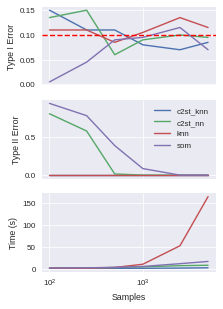

In [7]:
normal_scale_fig = plot_errors(ns_results, logscale=True, show_time=True)
normal_scale_fig.savefig(os.path.join(plot_dir, 'normal_scale_power_samples.eps'), bbox_inches='tight')

# Normal (scale, fair)

In [8]:
nsf1_cov = np.identity(len(means))
nsf2_cov = np.identity(len(means))
nsf1_cov[0, 0] = 4.

nsf1 = MultivariateNormalGenerator(means, cov=nsf1_cov)
nsf2 = MultivariateNormalGenerator(means, cov=nsf2_cov)

In [9]:
#nsf_results = stat_errors_vs_sample_size(nsf1, nsf2, tests, samples, repeat=repeat)
#nsf_results.to_csv('../../results/sample_size/nsf_results_samples.csv')
nsf_results = pandas.read_csv('../../results/sample_size/nsf_results_samples.csv', index_col=[0, 1])

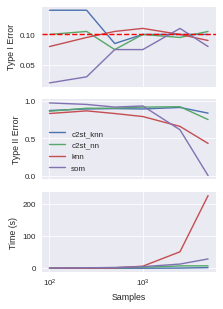

In [10]:
normal_scale_fair_fig = plot_errors(nsf_results, logscale=True, show_time=True)
normal_scale_fair_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_power_samples.eps'), bbox_inches='tight')